> **DO NOT EDIT IF INSIDE `caobd_s19` folder** 

# Assignment 2

**Handin in Peergrade**: *Monday*, October 21, 2019, 23:59<br>
**Peergrading deadline**: *Friday*, October 25, 2019, 23:59<br>
**Peergrading feedback deadline**: *Sunday*, October 27, 2019, 23:59

[**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 4

> **Ex. 4.3.2**: Implement cross validation using the [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) method. The performance of a classifier is strongly dependent on the amount of data it is trained on. In Ex. 4.3.1 you train it on only half of the data and test it on the other half. If you rerun that code multiple times, with random 50/50 partitions, you are gonna see a lot of uncertainty in performance. Cross validation solves this problem by training on a larger subset of the data and testing on a smaller one, and taking the average performance over K-folds of this process.
1. Implement cross validation over $K=10$ folds. For each fold you must record the training and test accuracies. In the end, visualize the distributions of test- and training accuracy as histograms in the same plot. Why are training accuracies consistently higher than testing accuracies (comment)?.

In [1]:
import re, os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("../data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]

In [3]:
def all_teams(): 
    
    # list to save the teams found
    all_teams = []
    
    # go through the villain folder CURRENTLY ONLY DOES IT FOR VILLAINS
    directory = "../data/villains/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"): 
            
            # open one of the markup files in the folder
            with open(os.path.join(directory, filename)) as f:
                content = f.read()
                
                list_of_filenames = []
                name = filename.split(".txt")[0]
                
                list_of_filenames.append(name)
                
                for names in list_of_filenames:
                    alliances = get_alliances(names)
                    
                    # check to see if alliance is in the all teams group already 
                    for alliance in alliances:
                         if alliance not in all_teams:
                            all_teams.append(alliance)
                            
     # go through the villain folder CURRENTLY ONLY DOES IT FOR VILLAINS
    directory = "../data/heroes/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"): 
            
            # open one of the markup files in the folder
            with open(os.path.join(directory, filename)) as f:
                content = f.read()
                
                list_of_filenames = []
                name = filename.split(".txt")[0]
                
                list_of_filenames.append(name)

                for names in list_of_filenames:
                    alliances = get_alliances(names)
                    
                    # check to see if alliance is in the all teams group already 
                    for alliance in alliances:
                         if alliance not in all_teams:
                            all_teams.append(alliance)
                            
     # go through the villain folder CURRENTLY ONLY DOES IT FOR VILLAINS
    directory = "../data/ambiguous/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".txt"): 
            
            # open one of the markup files in the folder
            with open(os.path.join(directory, filename)) as f:
                content = f.read()
                
                list_of_filenames = []
                name = filename.split(".txt")[0]
                
                list_of_filenames.append(name)
                
                for names in list_of_filenames:
                    alliances = get_alliances(names)
                    
                    # check to see if alliance is in the all teams group already 
                    for alliance in alliances:
                         if alliance not in all_teams:
                            all_teams.append(alliance)                       
    
    
    
    
    return all_teams

In [4]:
all_teams = all_teams() # get all the teams 

In [5]:
def get_teams_vector(char, faction=None, verbose=True):
    char_alliances = get_alliances(char)
    tmp = [1 if team in char_alliances else 0 for team in all_teams]
    
    if verbose:
        print(sum(tmp))
        
    return tmp

In [6]:
import numpy as np

def get_alliance_matrix():
    targ_array = []
    sort_vec = []
    team_matrix = []
    
    for faction, val in [["heroes", 1], ["villains",0]]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            char = char[:-4] # remove .txt file extension
            
            team_vec = get_teams_vector(char, verbose=False)
            if sum(team_vec) != 0:
                team_matrix.append(team_vec)
                targ_array.append([char, val]) # target array
                     
    # sort the matrix by character name
    team_matrix = np.matrix(team_matrix)
    team_matrix = team_matrix[np.argsort(targ_array, axis=0)[:,0]]
    
    # sort target array
    targ_array.sort()
    
    return targ_array, team_matrix, sort_vec

In [7]:
y_ta, X_ta, sort_vec  = get_alliance_matrix() # X_ta is alliance matrix, y_ta is target array

target_values = []

for i in range(1096): 
    target_values.append(y_ta[i][1])

In [8]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_ta, target_values)  # <--- This is the training/fitting/learning step

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Here were are implementing cross validation:

In [9]:
from sklearn.model_selection import cross_validate

t_array = np.asarray(target_values)
scores = cross_validate(model, X_ta, target_values, cv=10, return_train_score=True)

In [10]:
test_score = scores['test_score']
train_score = scores['train_score']

#### Here is the histogram of the test and training accuracy distributions:

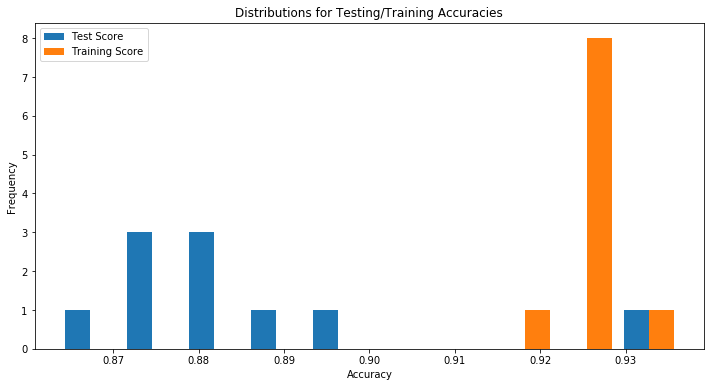

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist([test_score, train_score], label=["Test Score", "Training Score"])
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Distributions for Testing/Training Accuracies")
plt.legend()
plt.show()

#### Comments: 
Pretty good, maybe a bit of overfitting since there's high accuracy for training v. testing sets. 

>**Ex. 4.4.1**: Let's put our classifier to use!
* Retrain your model on all of your data.
* Create a team alliance representation of the ambiguous characters
* Use the model the estimate the probability that each character is a villain (let's call this *villainness*). You can use the `.predict_proba` method on the model to get probability estimates rather than class assignments.
* **Visualize the "heroness" distribution for all ambiguous characters**. Comment on the result.

In [12]:
model.fit(X_ta, target_values) # retraining model on whole dataset 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
# creating a team alliance representation of the ambiguous characters

def get_ambig_alliance_matrix():
    targ_array = []
    sort_vec = []
    team_matrix = []
    
    for faction in ["ambiguous"]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            char = char[:-4] # remove .txt file extension
            
            team_vec = get_teams_vector(char, verbose=False)
            if sum(team_vec) != 0:
                team_matrix.append(team_vec)
                targ_array.append(char) # target array            
            
    # sort the matrix by character name
    team_matrix = np.matrix(team_matrix)
    team_matrix = team_matrix[np.argsort(targ_array, axis=0)]
    
    # sort target array
    targ_array.sort()
    
    return targ_array, team_matrix, sort_vec

In [14]:
# getting the ambiguous characters target matrix and the ambiguous character matrix
ambig_target, ambig_matrix, sort_vec = get_ambig_alliance_matrix() 

In [15]:
ambig_mt = np.array(ambig_matrix)
villain_prob = model.predict_proba(ambig_mt) # estimating the probability that each character is a villain 

heroness = []

for i in range(len(villain_prob)):
    heroness.append(villain_prob[i][0])

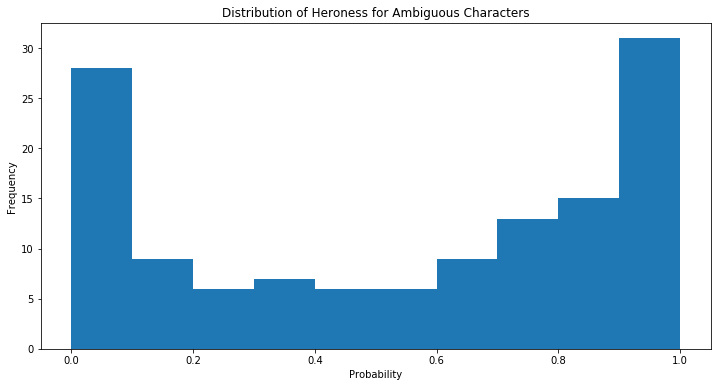

In [16]:
plt.figure(figsize=(12,6))
plt.hist(heroness) # visualizing the "heroness" distribution for all characters 
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Heroness for Ambiguous Characters")
plt.show()

#### Comments:
There are far more characters that have high probabilities for heroness meaning that many of these ambiguous characters aren't actually seen as ambiguous.

### Week 5

>**Ex. 5.1.3**: Print the maximum entropy path of a decision tree.
>
>1. Implement the following pseudocode and print the output:<br><br>
>Step 1. Find `team` that gives lowest split entropy for `data`. Print `team`.<br>
>Step 2. Split `data` on `team`, to produce `data0` and `data1`. Print the entropy of each, as well as their weighted avg. entropy.<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_6.2.3.1.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How splits are there? Do you notice anything interesting about the final splits? Why do we choose to stop splitting before `data` get smaller than 5?
>3. Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of the order of splits you just printed (a comment is fine)?

## SOLUTION:


In [17]:
VILLAIN_DIR = 'villains'
HERO_DIR = 'heroes'
AMBIGUOUS_DIR = 'ambiguous'

In [18]:
def get_alliances(char, faction=None):
    """Return list of alliances for Marvel character."""
    
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("../data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()

    # Get alliance field
    alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
    if alliances_field == []:
        return []

    # Extract teams from alliance field
    return list(set([t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]))

In [19]:
def get_all_alliances():
    
    teams = set([])
    
    for faction in ["heroes", "ambiguous", "villains"]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            with open("../data/%s/%s" % (faction, char)) as f:
                markup = f.read()
                
                # find alliances
                alliances_field = re.findall(r"alliances[\w\W]+?\|.+=", markup)
                
                if alliances_field != []:
                    [teams.add(t[2:-1]) for t in re.findall(r"\[\[.+?[\]\|]", alliances_field[0][10:])]
    
    teams = list(teams)
    teams.sort()
    
    return np.array(teams)

In [20]:
def get_teams_vector(char, faction=None, verbose=True):
    char_alliances = get_alliances(char)
    tmp = [1 if team in char_alliances else 0 for team in all_teams]
    
    
    if verbose:
        print(sum(tmp))
    
    return tmp

In [21]:
import numpy as np

def get_alliance_matrix():
    targ_array = []
    sort_vec = []
    team_matrix = []
    
    for faction, val in [["heroes", 1], ["villains",0]]: # for each faction
        for char in os.listdir("../data/%s" % faction): # for each character in faction
            char = char[:-4] # remove .txt file extension
            
            team_vec = get_teams_vector(char, verbose=False)
            if sum(team_vec) != 0:
                team_matrix.append(team_vec)
                targ_array.append([char, val]) # target array
#                 sort_vec.append([char, val])
            
            
    # sort the matrix by character name
    team_matrix = np.matrix(team_matrix)
    team_matrix = team_matrix[np.argsort(targ_array, axis=0)[:,0]]
    
    # sort target array
    targ_array.sort()
    
    return targ_array, team_matrix, sort_vec

In [22]:
all_teams = get_all_alliances()
target_array, team_matrix, sort_vec = get_alliance_matrix()

In [23]:
def compute_shannon_entropy(pdf):
    
    entropy = 0
    
    for p in pdf:
        entropy += p * np.log2(p)
        
    return -1*entropy

In [24]:
def find_pmf(arr):
    labels = arr[:,1]
    
    val, count = np.unique(labels, return_counts=True)
    
    return count / len(labels)

In [25]:
def split_by_team(list_teams, char_array, matrix, team):
    
    assert len(list_teams)==matrix.shape[1]
    
    # find index of team
    index_team = np.where(list_teams==team)
    
    # indices of characters in team
    member_indices = [i for i,char in enumerate(matrix[:, index_team]) if char.item(0)==1]
    # indices of non-members
    nonmember_indices = np.arange(len(char_array))
    nonmember_indices = np.delete(nonmember_indices, member_indices)
    
    # list of members and nonmembers
    team_members = np.array(char_array)[member_indices]
    team_nonmembers = np.array(char_array)[nonmember_indices]
    
    return team_members, team_nonmembers, member_indices, nonmember_indices

In [26]:
def compute_list_entropy(list_team):
    return compute_shannon_entropy(find_pmf(list_team))

In [27]:
def compute_split_weighted_avg_entropy(list_teams, char_array, matrix, team):
    """
    args:
        list_teams: list of all teams in alphabetical order
        char_array: list of characters and whether they are a hero (1) or villain (0)
        matrix: matrix of characters and their association with a team
        team: team to split data on 
    """
    
    team_members, team_nonmembers, member_indices, nonmember_indices = split_by_team(list_teams, char_array, matrix, team)
    
    entropy_members = compute_list_entropy(team_members)
    entropy_nonmembers = compute_list_entropy(team_nonmembers)
    
    # split entropy
    weighted_avg_entropy = (len(team_members) / len(char_array)) * entropy_members + (len(team_nonmembers) / len(char_array)) * entropy_nonmembers
    
    return weighted_avg_entropy

In [28]:
def compute_all_weighted_avgs(list_teams, char_array, matrix, teams):
    weighted_avgs = []
    for team in teams:
        weighted_avgs.append(compute_split_weighted_avg_entropy(list_teams, char_array, matrix, team))
    return weighted_avgs

In [29]:
data = target_array
list_teams = all_teams
matrix = team_matrix

split_iter = 0

while len(data) >= 5:
    
#     print('data size: %d' % len(data))
#     print('list_teams size: %d' % len(list_teams))
#     print('matrix shape: %d x %d' % (matrix.shape))
    
    # calculate the weighted avgs
    weighted_avgs = compute_all_weighted_avgs(list_teams, data, matrix, list_teams)
    min_entropy_arg = np.argmin(weighted_avgs) # find index of minimum
    team_name = all_teams[min_entropy_arg] # find teamname of minimum
    
    print('Split %d : %s' % (split_iter, team_name))
    print('-' * (10 + len(team_name)))
    
    split_iter += 1

    # split by lowest entropy team
    data0, data1, data0_indices, data1_indices = split_by_team(list_teams, data, matrix, team_name)
    
    # compute entropies
    entropy_data0 = compute_list_entropy(data0)
    entropy_data1 = compute_list_entropy(data1)
    # compute average weighted entropy
    weighted_avg_entropy = weighted_avgs[min_entropy_arg]

    print('\tdata0:\n\t\tsize:\t%d\n\t\tentropy:\t%f' % (len(data0), entropy_data0))
    print('\tdata1:\n\t\tsize:\t%d\n\t\tentropy:\t%f' % (len(data1), entropy_data1))
    print('\t--> average entropy: %f\n' % weighted_avg_entropy)
    
    # find indices to delete and replace dataset
    if entropy_data0 > entropy_data1:
        delete_indices = data1_indices
        data = data0
    else:
        delete_indices = data0_indices
        data = data1        
    
    # remove current team from list_teams
    list_teams = np.delete(list_teams, np.argwhere(list_teams==team_name))
    
    # remove the char entries from matrix
    matrix = np.delete(matrix, delete_indices, axis=0)
    
    # remove team entry from matrix
    matrix = np.delete(matrix, min_entropy_arg, axis=1)

Split 0 : Avengers (comics)
---------------------------
	data0:
		size:	92
		entropy:	0.304587
	data1:
		size:	1004
		entropy:	0.993116
	--> average entropy: 0.935320

Split 1 : X-Mansion#Post X-Men: Schism
--------------------------------------
	data0:
		size:	5
		entropy:	0.721928
	data1:
		size:	999
		entropy:	0.992614
	--> average entropy: 0.935686

Split 2 : Marvel Super Hero Contest of Champions
------------------------------------------------
	data0:
		size:	2
		entropy:	-0.000000
	data1:
		size:	997
		entropy:	0.992287
	--> average entropy: 0.948590

Split 3 : Shi'ar
----------------
	data0:
		size:	7
		entropy:	0.863121
	data1:
		size:	990
		entropy:	0.992627
	--> average entropy: 0.963220

Split 4 : New Mutants#The New Mutants, vol. 2
---------------------------------------------
	data0:
		size:	4
		entropy:	-0.000000
	data1:
		size:	986
		entropy:	0.991960
	--> average entropy: 0.963614

Split 5 : Lemuria (comics)
--------------------------
	data0:
		size:	1
		entropy:	-0.00

The decision path finishes after 10 splits. The final split is interesting to take note of since the `data` variable is overwritten by `data0` which has size 2. The process chooses to stop splitting before the data gets smaller than 5 because `data0` has the higher entropy of the two datasets. 

In [30]:
from sklearn.tree import DecisionTreeClassifier

marvel_dtc = DecisionTreeClassifier(criterion='entropy')

marvel_dtc.fit(team_matrix, target_array)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
important_feats = np.argsort(np.array(marvel_dtc.feature_importances_))[::-1]

topten_important_feats = important_feats[:10]

print("The 10 most important feature are: ")

for f in topten_important_feats:
    print("\t - %s" % all_teams[f])

The 10 most important feature are: 
	 - Avengers (comics)
	 - X-Men
	 - Masters of Evil
	 - S.H.I.E.L.D.
	 - Thunderbolts (comics)
	 - Defenders (comics)
	 - Maggia (comics)
	 - Brotherhood of Mutants
	 - Hellfire Club (comics)
	 - New Warriors


Interestingly, the list of ten most important teams to split by is not consistent with the order of the splits printed by above. Not quite sure why this is the case. There might be better splits made by the `sklearn` library than we did above. 

### Week 6

> **Ex. 6.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

## SOLUTION:

Nodes:  [1, 2, 3, 4]
Edges:  [(1, 2), (1, 3), (1, 4), (3, 4)]


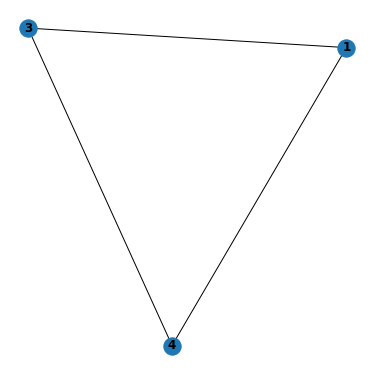

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# create graph 
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4]) # add nodes
G.add_edges_from([(1, 2), (1, 3), (1,4), (3,4)]) # add edges

print("Nodes: ", G.nodes)
print("Edges: ", G.edges)

G.remove_node(2) # remove node 2

# plot
plt.figure(figsize=(5,5))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-2.2/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?
>
> The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. The network begins with an initial connected network of $m_0$ nodes.
New nodes are added to the network one at a time. Each new node is connected to $m \leq m_0$ existing nodes with a probability that is proportional to the number of links that the existing nodes already have. 


## SOLUTION:

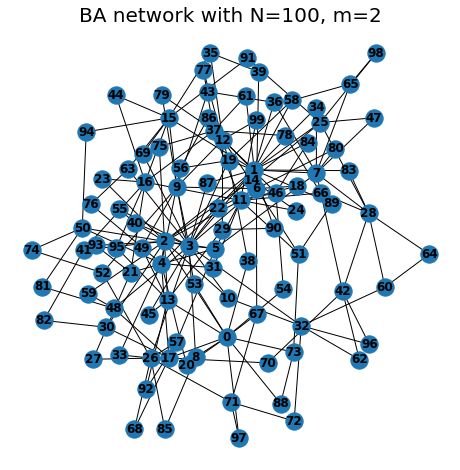

In [33]:
# generate and plot BA network
ba = nx.barabasi_albert_graph(100, 2)

# plot
plt.figure(figsize=(8,8))
plt.title("BA network with N=100, m=2", fontsize=20)
nx.draw(ba, with_labels=True, font_weight='bold')
plt.show()

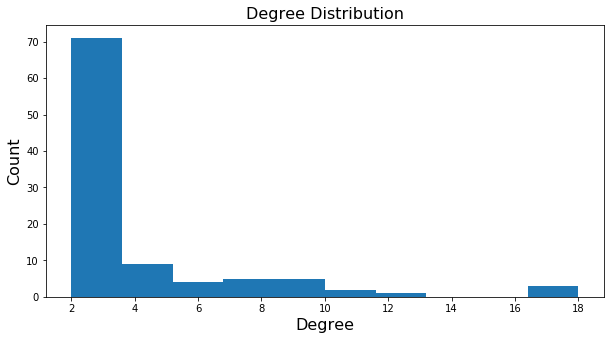

In [34]:
#obtain list of all node degrees
deg_list = []
nodes = []

for i in ba.degree:
    deg_list.append(i[1])
    nodes.append(i[0])

# plot
plt.figure(figsize=(10,5))
plt.hist(deg_list)
plt.title("Degree Distribution", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Degree", fontsize=16)
plt.show()

> The BA graph is tail heavy when compared to the ER graph, which has a more even distribution
>
> Other methods of comparing the two networks could be to look at the number of strongly connected nodes and the shortest paths between each nodes

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

## SOLUTION:

In [35]:
#helper method
import re, os

def get_partners(char, faction=None):
    """Return list of alliances for Marvel character."""
    if faction is None:
        for faction in ["heroes", "ambiguous", "villains"]:
            faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
            if char in faction_chars:
                break
    
    # Load character markup
    with open("./data/%s/%s.txt" % (faction, char)) as fp:
        markup = fp.read()
        
    # Get partners field
    partners_field = re.findall(r"\| *partners[\w\W]+?\|.+=", markup)
    if partners_field == []:
        return []
 
    # Extract links from partners field
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0])]

In [36]:
#DATA FOLDER MUST BE IN SAME DIRECTORY AS THIS FILE
#prepare data for graph

valid_chars=[]
valid_chars = set(valid_chars)


#add valid chars that have at least dim 1 to set
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]    
   
    for char in faction_chars:
        if len(get_partners(char)) != 0:
            valid_chars.add(char)
            
            
invalid_chars = []
invalid_chars = set(invalid_chars)

#remove chars with partners not in faction
for char in valid_chars:
    for partner in get_partners(char):
        if partner not in valid_chars:
            invalid_chars.add(partner)

valid_chars = valid_chars - invalid_chars

In [37]:
#build graph
marvel_partners = nx.Graph()

#add nodes
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
    
    for char in faction_chars:
        if char in valid_chars:
            #append faction label to node
            marvel_partners.add_node(char,faction_label=faction)

#add edges
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("./data/%s" % faction)]
    
    for char in faction_chars:
        partners = get_partners(char)
        if len(partners) != 0:
            for p in partners:
                if p in valid_chars:
                    marvel_partners.add_edge(char,p)
    

#remove nodes with no partners
isolated = list(nx.isolates(marvel_partners))
marvel_partners.remove_nodes_from(isolated) 

In [38]:
num_nodes = marvel_partners.number_of_nodes()
num_edges = marvel_partners.number_of_edges()
avg_degree = num_edges * 2 / num_nodes

print("Network Summary: -------")
print("\tNumber of nodes: %d\n\tNumber of edges: %d\n\tAverage degree of network: %f" % (num_nodes, num_edges, avg_degree))

Network Summary: -------
	Number of nodes: 177
	Number of edges: 171
	Average degree of network: 1.932203


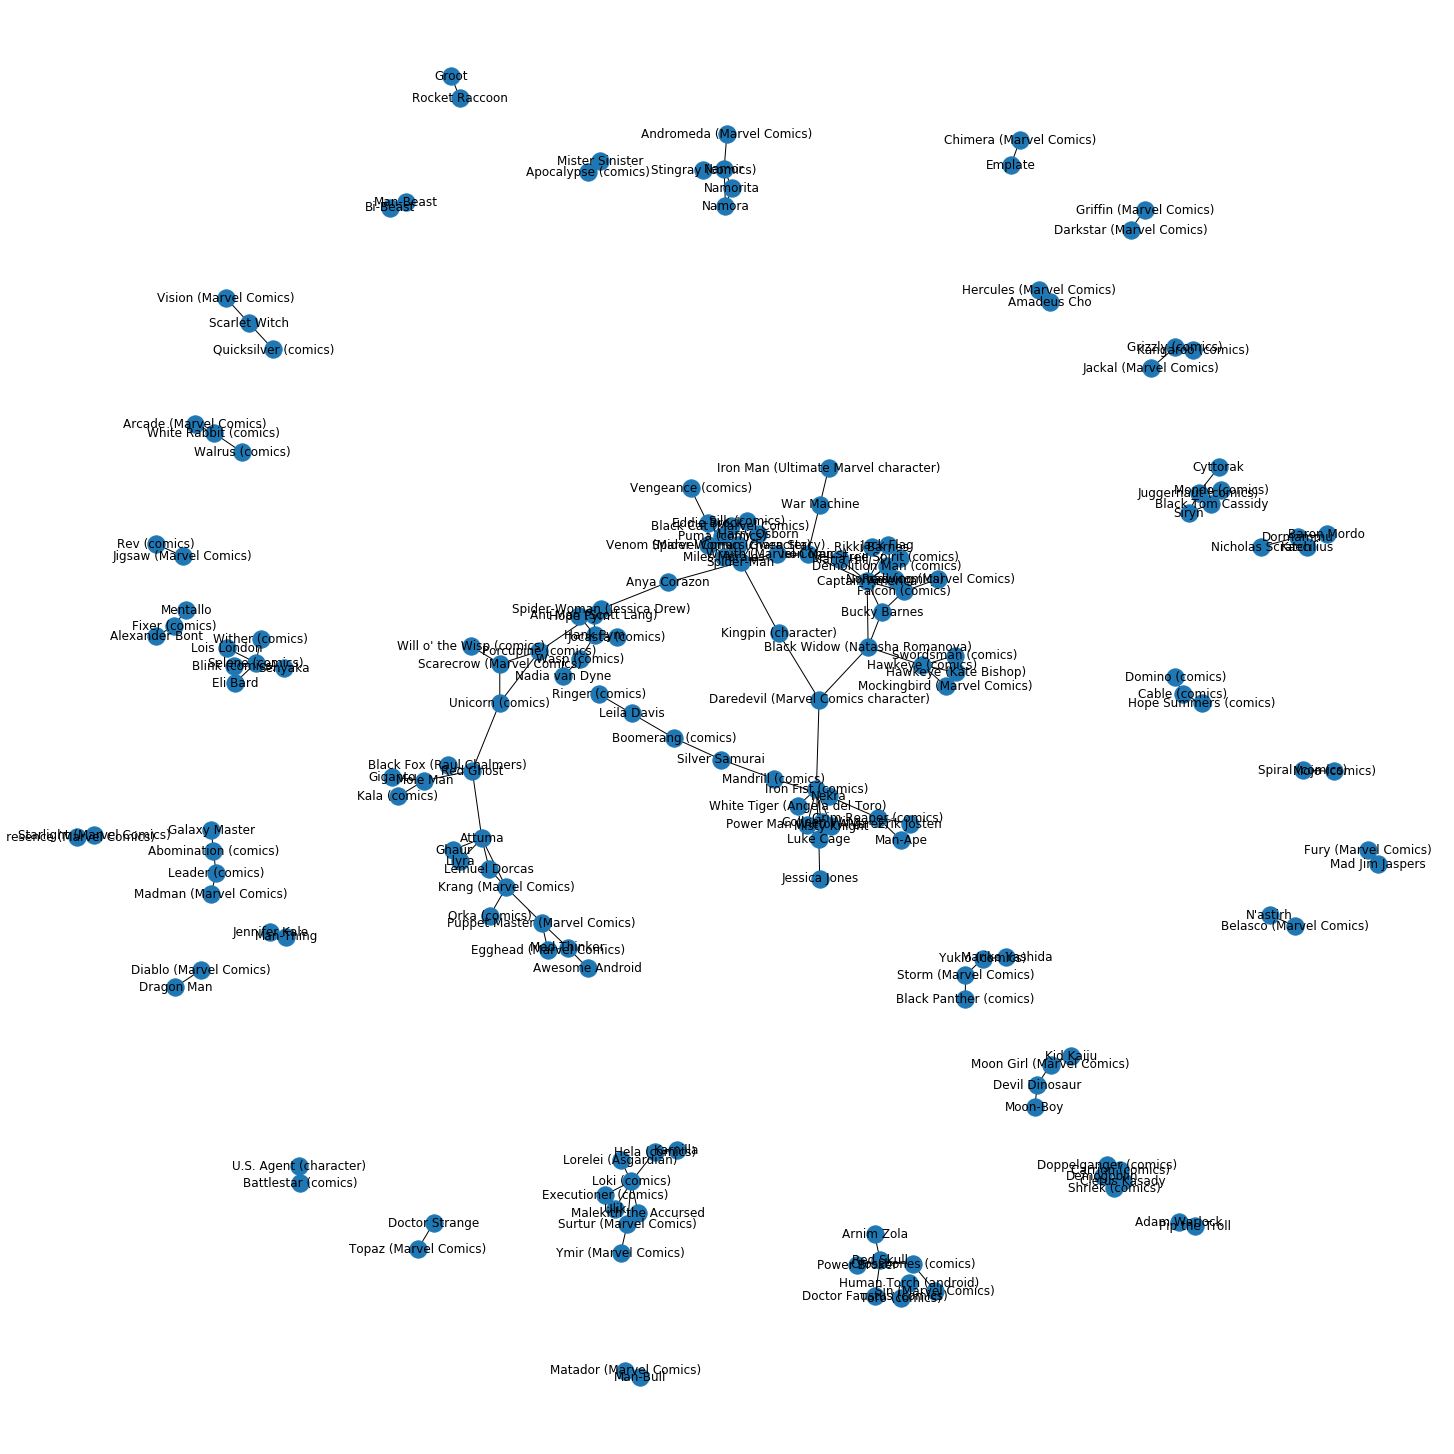

In [39]:
#plot graph
plt.figure (figsize =(20,20))
nx.draw(marvel_partners, with_labels=True)
plt.show()

> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

## SOLUTION:

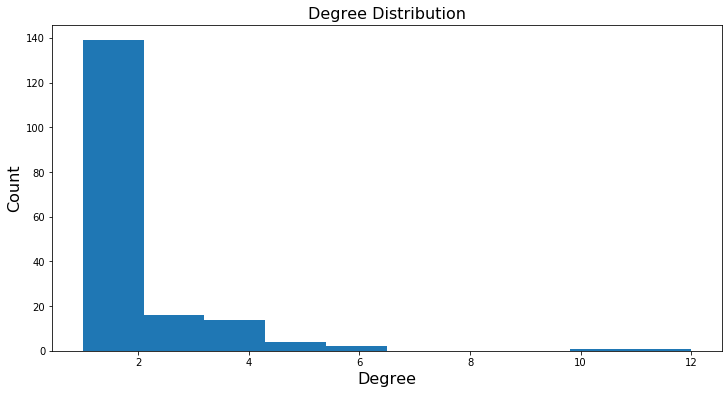

In [40]:
#grab degrees of all nodes
deg_list = []

for i in marvel_partners.degree:
    deg_list.append(i[1])

plt.figure(figsize=(12,6))
plt.hist(deg_list)
plt.title("Degree Distribution", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Degree", fontsize=16)
plt.show()

> This is similar to the BA network since the distribution is tail heavy

> **Ex: 6.2.7**: Let's make a nice plot of the network.I built a Python library called Netwulf (go `pip install netwulf`) that allows you to interactively plot networks in Python. Go ahead and produce a beautiful looking network using that! Comment on what you see.

## SOLUTION:

In [41]:
import networkx as nx
from netwulf import visualize

visualize(marvel_partners)

(None, None)

> The beautiful looking network has one big sort of "community" with spiderman and ironman sort of in the middle of the group. There are a lot of smaller tightly-knit groups in the network.